In [1]:
from pymongo import MongoClient
import pickle

In [2]:
client = MongoClient()

In [3]:
db = client.dbsc

In [4]:
db.collection_names()

[u'hmmr', u'hmr', u'system.indexes']

In [5]:
td = db.testData

In [6]:
cursor = td.find()

In [7]:
#cursor.next()

In [8]:
list(cursor)

[]

In [9]:
with open('heavy_metal_parsed.pkl', 'r') as infile:
    reviews = pickle.load(infile)
type(reviews)

list

In [10]:
reviews[0].keys()

['raw',
 'head',
 'metal_cred',
 'title',
 'direct',
 'solid_metal_nuggets',
 'cast',
 'the_meat',
 'year',
 'sections']

In [11]:
reviews[0]

{'cast': [u'Frank Zappa',
  u'Ringo Starr',
  u'Mark Volman',
  u'Howard Kaylan',
  u'Keith Moon'],
 'direct': [u'Tony Palmer', u'Frank Zappa'],
 'head': [u'200 MOTELS (1971)',
  u'DIRECTORS: Tony Palmer, Frank Zappa',
  u'CAST: Frank Zappa, Ringo Starr, Mark Volman, Howard Kaylan, Keith\nMoon'],
 'metal_cred': [u'METAL CRED', u'Frank Zappa', u'Nun Desecration'],
 'raw': [u'200 MOTELS (1971)',
  u'DIRECTORS: Tony Palmer, Frank Zappa',
  u'CAST: Frank Zappa, Ringo Starr, Mark Volman, Howard Kaylan, Keith\nMoon',
  u'METAL CRED',
  u'Frank Zappa',
  u'Nun Desecration',
  u'THE MEAT',
  u'Beyond his metal sainthood for\nbattling the censor-witches of the PMRC and getting named checked by Deep\nPurple in \u201cSmoke on the Water\u201d, musical visionary Frank Zappa led many rock\nfans to heavy metal.',
  u'And, from there, he led many metal\nfans to the outer expanses of rock\u2019s possibilities.',
  u'Zappa also opened countless banging\nheads to the far reaches of jazz, classical, doo-w

In [12]:
len(reviews)

877

In [13]:
hmm = client.dsbc.hmm

In [14]:
hmm.insert(reviews[0])

ObjectId('555e05b7bb9ab404231065ad')

In [15]:
hmm.find().next()

{u'_id': ObjectId('555ccadebb9ab40daf0a8d14'),
 u'cast': [u'Cannibis', u'Fallen Grace', u'Funeral in Heaven', u'Merlock'],
 u'direct': [u'Naveen Marasinghe', u'Dinesh Guneratne'],
 u'head': [u'ARISE: THE SRI LANKAN METAL MUSIC DOCUMENTARY (2010)\nDIRECTORS: Naveen Marasinghe, Dinesh\nGuneratne',
  u'CAST: Cannibis, Fallen Grace, Funeral in Heaven, Merlock'],
 u'metal_cred': [u'METAL CRED',
  u'Few of us were overly hip to the\nSri Lankan metal scene before this movie.'],
 u'raw': [u'ARISE: THE SRI LANKAN METAL MUSIC DOCUMENTARY (2010)\nDIRECTORS: Naveen Marasinghe, Dinesh\nGuneratne',
  u'CAST: Cannibis, Fallen Grace, Funeral in Heaven, Merlock',
  u'METAL CRED',
  u'Few of us were overly hip to the\nSri Lankan metal scene before this movie.',
  u'THE MEAT',
  u'Shot on the fly throughout 2008 and\n2009 by young metal fans with borrowed video cameras, Arise opens up the world of heavy metal in Sri Lanka by focusing on\nfour bands practicing four distinct forms of the music.',
  u'Canni

In [16]:
for review in reviews[1:]:
    hmm.save(review)

In [17]:
cursor = hmm.find()

In [18]:
len(list(cursor))

1714

In [19]:
hmm.count()

1714

In [20]:
type(reviews)

list

# Pymongo Challenges

## Challenge 1

Make a histogram of the years in the data. How many metal movies came out over the years?

## Challenge 2

Find the cast member that appeared in most Heavy Metal movies. Is there one that is shared by more than one of these movies? Or are they all completely different actors for every movie?

## Challenge 3

Find the most used words in Heavy Metal film titles. Is there a word that appears in a lot of them? Is it "The"? If it is something like "the", How can you get around that? Find one "meaningful" word that appears the most (this means non-structural word, unlike "the" or "a" or "in")

## Challenge 4

METAL CRED section lists themes included in these movies that makes them more metal. What were the top 5 metal cred keywords in the 70s? In 80s? In 90s, In 2000s?

## Challenge 5

Let's use the length of the METAL CRED section as a proxy score for how metal a movie is. Let's call this the METAL SCORE. To each mongo document, add the metal_score as a new field.

## Challenge 6

Find the director that is MOST METAL per movie (director with the highest average metal score). Remember that some movies have multiple directors.

## Challenge 7

The majority of directors and actors will have worked on a single movie. See if there are any directors that worked with an actor more than once. If so, find the director-actor duo that have worked together the most times.

## Challenge 8

Create an index on the 'director' field to make the queries involving it faster. What is an index? (see Link)

(see Link) Creating an index in mongo Creating an index in pymongo Single field index on mongo Mongo documentation on indexes

In [21]:
with open("heavy_metal_parsed.pkl", 'r') as datafile:
    heavy_metal_reviews = pickle.load(datafile)

In [22]:
first_review = heavy_metal_reviews[0]
for line in first_review['raw']:
    print line

200 MOTELS (1971)
DIRECTORS: Tony Palmer, Frank Zappa
CAST: Frank Zappa, Ringo Starr, Mark Volman, Howard Kaylan, Keith
Moon
METAL CRED
Frank Zappa
Nun Desecration
THE MEAT
Beyond his metal sainthood for
battling the censor-witches of the PMRC and getting named checked by Deep
Purple in “Smoke on the Water”, musical visionary Frank Zappa led many rock
fans to heavy metal.
And, from there, he led many metal
fans to the outer expanses of rock’s possibilities.
Zappa also opened countless banging
heads to the far reaches of jazz, classical, doo-wop, and any other art form
that could involve (brilliant) noise and (brilliantly dumb) dirty jokes.
200
Motels is Zappa’s first crack at major motion picture madness, and it
embodies the much forgotten cultural moment when acid rock tumbled forever into
the black pits of rising heavy metal.
Surrealistic sketches and
psychedelic set pieces about the insanity of a being on tour are interspersed
among performances in which the Mothers jam with London 

In [23]:
len(heavy_metal_reviews)

877

In [24]:
print first_review.keys()

['raw', 'head', 'metal_cred', 'title', 'direct', 'solid_metal_nuggets', 'cast', 'the_meat', 'year', 'sections']


In [25]:
print first_review['year']

1971


In [26]:
len(first_review)

10

In [27]:
print first_review['raw'][0]

200 MOTELS (1971)


In [28]:
hmmr = db.hmmr

In [29]:
for review in heavy_metal_reviews:
    hmmr.insert(review)

DuplicateKeyError: E11000 duplicate key error index: dbsc.hmmr.$_id_ dup key: { : ObjectId('555e05babb9ab40423106c48') }

In [30]:
#hmmr.find().next()

In [31]:
db.hmmr.count()

1712

In [32]:
#d = datetime.datetime(2009, 11, 12, 12)
#for reviews1971 in hmmr.find({"year": {"$lt": 1971}}).sort("title"):
#    print reviews1971

In [33]:
print hmmr.find_one({"_id": "555cede8bb9ab40daf0a9388"})

None


## Challenge 1  (Note: check .aggregate function or group() method in Pymongo

In [34]:
hmmr.find({"year": 1971}).count()

34

In [35]:
years = []
for review in heavy_metal_reviews:
    if review['year'] not in years:
        years.append(review['year'])
years.sort()

In [36]:
year_count = {}
for year in years:
    year_count[year] = hmmr.find({"year": year}).count()

Populating the interactive namespace from numpy and matplotlib


<Container object of 74 artists>

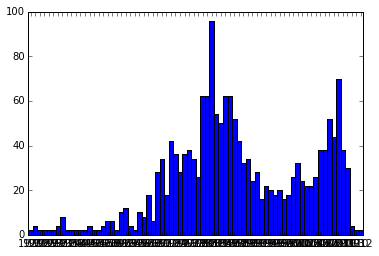

In [37]:
import matplotlib.pyplot as plt
%pylab inline
year = []
movies = []
for y in year_count:
    year.append(y)
    movies.append(year_count[y])
pos = np.arange(len(year))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(year)
plt.bar(pos, movies, width, color=['blue'])

## Challenge 2

In [38]:
print first_review['cast'][1]

Ringo Starr


In [39]:
actors = []
for review in heavy_metal_reviews:
    for a in range(len(review['cast'])):
        if review['cast'][a] not in actors:
            actors.append(review['cast'][a])

In [40]:
actor_count = {}
for actor in actors:
    actor_count[actor] = hmmr.find({"cast": actor}).count()

In [41]:
import operator
actors_sorted = sorted(actor_count.items(), key=lambda x: (-x[1], x[0]))

In [42]:
actors_sorted[1]

(u'Alice Cooper', 30)

In [43]:
for inmovies in hmmr.find({"cast": "Alice Cooper"}):
    print inmovies['title']

ALICE COOPER: THE NIGHTMARE
ALICE COOPER: WELCOME TO MY NIGHTMARE
DARK SHADOWS
THE DECLINE OF WESTERN CIVILIZATION PART II: THE METAL YEARS
DIARY OF A MADE HOUSEWIFE
FREDDY’S DEAD: THE FINAL NIGHTMARE
METAL: A HEADBANGER’S JOURNEY
MONSTER DOG
OZZY OSBOURNE: DON’T BLAME ME
SEXTETTE
SGT. PEPPER’S LONELY HEARTS CLUB BAND
THE STORY OF ROCK ‘N’ ROLL COMICS
SUCK
WAYNE’S WORLD
ROADIE
ALICE COOPER: THE NIGHTMARE
ALICE COOPER: WELCOME TO MY NIGHTMARE
DARK SHADOWS
THE DECLINE OF WESTERN CIVILIZATION PART II: THE METAL YEARS
DIARY OF A MADE HOUSEWIFE
FREDDY’S DEAD: THE FINAL NIGHTMARE
METAL: A HEADBANGER’S JOURNEY
MONSTER DOG
OZZY OSBOURNE: DON’T BLAME ME
SEXTETTE
SGT. PEPPER’S LONELY HEARTS CLUB BAND
THE STORY OF ROCK ‘N’ ROLL COMICS
SUCK
WAYNE’S WORLD
ROADIE


## Challenge 3

In [52]:
from collections import defaultdict
import re

text = str(first_review['the_meat'])
freq = defaultdict(int)
for w in re.findall(r"\w+", text):
    freq[w.lower()] += 1
freq

defaultdict(<type 'int'>, {'being': 1, 'major': 1, 'steve': 1, 'zappa': 5, 'london': 1, 'outer': 1, 'how': 1, 'yngwie': 1, 'to': 3, 'jam': 1, 'black': 1, 'nfans': 2, 'crack': 1, 'he': 2, 'his': 2, 'string': 1, 'far': 1, 'jazz': 1, 'cultural': 1, 'every': 1, 'npurple': 1, 'during': 1, 'meat': 1, 'mothers': 1, 'possibilities': 1, 'jokes': 1, 'interspersed': 1, 'witches': 1, 'rock': 3, 'heavy': 2, 'set': 1, 'art': 1, 'classical': 1, '200': 1, 'nembodies': 1, 'dumb': 1, 'are': 1, 'nthe': 1, 'beyond': 1, 'nheads': 1, 'plays': 2, 'opened': 1, 'for': 1, 'pmrc': 1, 'wop': 1, 'ringo': 1, 'u2019s': 2, 'sainthood': 1, 'noise': 1, 'led': 2, 'philharmonic': 1, 'frank': 1, 'malmsteen': 1, 'water': 1, 'from': 1, 'u201d': 1, 'on': 3, 'surrealistic': 1, 'getting': 1, 'brilliant': 1, 'of': 6, 'could': 1, 'parts': 1, 'motion': 1, 'tour': 1, 'forgotten': 1, 'first': 1, 'sketches': 1, 'named': 1, 'madness': 1, 'vail': 1, 'into': 1, 'reaches': 1, 'nmotels': 1, 'rising': 1, 'throughout': 1, 'brilliantly': 1,

In [53]:
#from bson.code import Code
#mapper = Code("""
#               function () {
#                 this.tags.forEach(function(z) {
#                   emit(z, 1);
#                 });
#               }
#               """)

In [54]:
#reducer = Code("""
#                function (key, values) {
#                  var total = 0;
#                  for (var i = 0; i < values.length; i++) {
#                    total += values[i];
#                  }
#                  return total;
#                }
#                """)

In [81]:
words = []
curfind = hmmr.find()

In [82]:
stopw = ['a','able','about','across','after','all','almost','also','am','among',
             'an','and','any','are','as','at','be','because','been','but','by','can',
             'cannot','could','dear','did','do','does','either','else','ever','every',
             'for','from','get','got','had','has','have','he','her','hers','him','his',
             'how','however','i','if','in','into','is','it','its','just','least','let',
             'like','likely','may','me','might','most','must','my','neither','no','nor',
             'not','of','off','often','on','only','or','other','our','own','rather','said',
             'say','says','she','should','since','so','some','than','that','the','their',
             'them','then','there','these','they','this','tis','to','too','twas','us',
             'wants','was','we','were','what','when','where','which','while','who',
             'whom','why','will','with','would','yet','you','your']

In [83]:
for i in range(hmmr.count()):
    title = curfind.next()['title']
    title = title.lower() 
    title = re.sub(r'[^\w\s]', '', title)
    title = title.split()
    words.extend(title)

In [84]:
wordslist = []
for w in words:
    if str(w) not in stopw:
        wordslist.append(w)

wordscount = Counter(wordslist)

In [85]:
print wordscount

Counter({u'metal': 72, u'dead': 48, u'rock': 38, u'heavy': 38, u'2': 34, u'blood': 28, u'black': 28, u'last': 26, u'night': 26, u'devil': 24, u'ii': 24, u'death': 24, u'man': 20, u'hell': 20, u'house': 18, u'nightmare': 18, u'iii': 16, u'evil': 16, u'iron': 16, u'massacre': 16, u'horror': 14, u'return': 14, u'dawn': 14, u'story': 14, u'part': 14, u'witch': 12, u'living': 12, u'saw': 12, u'movie': 12, u'dark': 12, u'world': 12, u'terror': 10, u'darkness': 10, u'new': 10, u'texas': 10, u'beyond': 10, u'dracula': 10, u'warriors': 10, u'dr': 10, u'bad': 10, u'devils': 10, u'3': 10, u'lost': 10, u'documentary': 10, u'planet': 10, u'film': 10, u'2000': 10, u'lord': 8, u'frankenstein': 8, u'heaven': 8, u'cannibal': 8, u'satan': 8, u'white': 8, u'diary': 8, u'maiden': 8, u'day': 8, u'year': 8, u'satans': 8, u'paradise': 8, u'days': 8, u'apocalypse': 8, u'miss': 8, u'city': 8, u'depravity': 8, u'rings': 8, u'fire': 8, u'wild': 8, u'hercules': 8, u'sodom': 8, u'alice': 8, u'hard': 8, u'deep': 8,

In [58]:
#from bson.code import Code
#reducer = Code("""
#               function(obj, prev){
#                 prev.count++;
#               }
#               """)
#results = hmmr.group(key={"the_meat":1}, condition={}, initial={"count": 0}, reduce=reducer)
#for doc in results:
#    print doc